# Spatial data operations
https://py.geocompx.org/03-spatial-operations

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage
import scipy.stats
import shapely
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterio.merge
import rasterio.features

In [2]:
nz = gpd.read_file('data/nz.gpkg')
nz_height = gpd.read_file('data/nz_height.gpkg')
world = gpd.read_file('data/world.gpkg')
cycle_hire = gpd.read_file('data/cycle_hire.gpkg')
cycle_hire_osm = gpd.read_file('data/cycle_hire_osm.gpkg')
src_elev = rasterio.open('output/elev.tif')
src_landsat = rasterio.open('data/landsat.tif')
src_grain = rasterio.open('output/grain.tif')

## 3.2 spatial operations on vector data

In [3]:
canterbury = nz[nz['Name'] == 'Canterbury']
canterbury

,Name,Island,Land_area,Population,Median_income,Sex_ratio,geometry
10,Canterbury,South,44504.499091,612000.0,30100,0.975327,"MULTIPOLYGON (((1686901.914 5353232.66, 167999..."


In [4]:
nz

,Name,Island,Land_area,Population,Median_income,Sex_ratio,geometry
0,Northland,North,12500.561149,175500.0,23400,0.942453,"MULTIPOLYGON (((1745493.196 6001802.169, 17405..."
1,Auckland,North,4941.572557,1657200.0,29600,0.944286,"MULTIPOLYGON (((1803822.103 5900006.143, 17914..."
2,Waikato,North,23900.036383,460100.0,27900,0.952050,"MULTIPOLYGON (((1860345.005 5859664.761, 18578..."
3,Bay of Plenty,North,12071.144689,299900.0,26200,0.928039,"MULTIPOLYGON (((2049387.29 5832785.434, 205101..."
4,Gisborne,North,8385.826619,48500.0,24400,0.934973,"MULTIPOLYGON (((2024489.357 5674919.854, 20190..."
5,Hawke's Bay,North,14137.524441,164000.0,26100,0.923838,"MULTIPOLYGON (((2024489.357 5674919.854, 20241..."
6,Taranaki,North,7254.480433,118000.0,29100,0.956936,"MULTIPOLYGON (((1740438.216 5714538.134, 17438..."
7,Manawatu-Wanganui,North,22220.608387,234500.0,25000,0.938773,"MULTIPOLYGON (((1866732.458 5664323.109, 18689..."
8,Wellington,North,8048.552772,513900.0,32700,0.933552,"MULTIPOLYGON (((1881590.326 5489434.391, 18756..."
9,West Coast,South,23245.455880,32400.0,26900,1.013907,"MULTIPOLYGON (((1557042.169 5319333.386, 15542..."


In [5]:
canterbury.explore()

In [6]:
nz_height.explore()

In [7]:
sel = nz_height.intersects(canterbury.geometry.iloc[0])
sum(np.uint(sel))

np.uint64(70)

In [8]:
canterbury_height = nz_height[sel]
canterbury_height

,t50_fid,elevation,geometry
4,2362630,2749,POINT (1378169.6 5158491.453)
5,2362814,2822,POINT (1389460.041 5168749.086)
6,2362817,2778,POINT (1390166.225 5169466.158)
7,2363991,3004,POINT (1372357.036 5172728.743)
8,2363993,3114,POINT (1372062.487 5173236.285)
...,...,...,...
90,2365400,2723,POINT (1436552.349 5197470.702)
91,2365454,2706,POINT (1438695.851 5200244.307)
92,2380298,2877,POINT (1652788.127 5348984.469)
93,2380300,2711,POINT (1654213.379 5349962.973)


<Axes: >

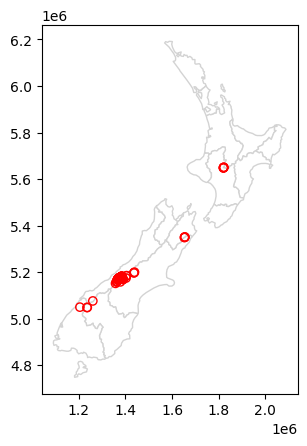

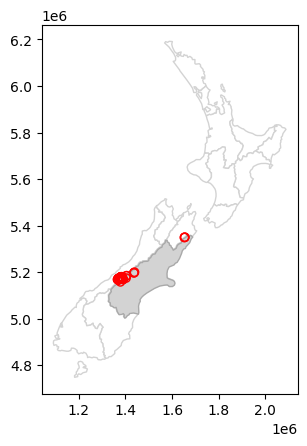

In [9]:
# Original
base = nz.plot(color='white', edgecolor='lightgrey')
nz_height.plot(ax=base, color='None', edgecolor='red')

# Subset (intersects)
base = nz.plot(color='white', edgecolor='lightgrey')
canterbury.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
canterbury_height.plot(ax=base, color='None', edgecolor='red')

In [10]:
sel = nz_height.disjoint(canterbury.geometry.iloc[0])
canterbury_height2 = nz_height[sel]

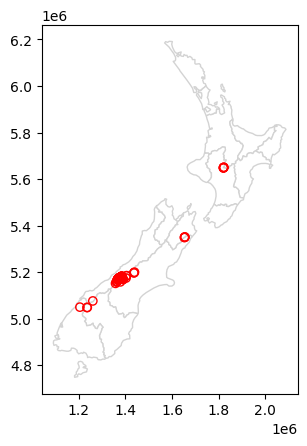

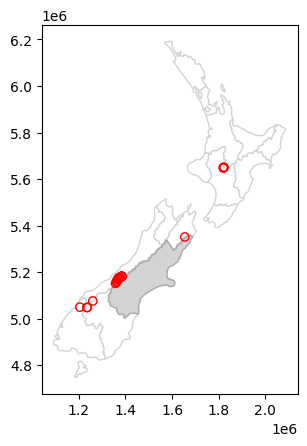

In [11]:
# Original
base = nz.plot(color='white', edgecolor='lightgrey')
nz_height.plot(ax=base, color='None', edgecolor='red');
# Subset (disjoint)
base = nz.plot(color='white', edgecolor='lightgrey')
canterbury.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
canterbury_height2.plot(ax=base, color='None', edgecolor='red');

In [12]:
canterbury_southland = nz[nz['Name'].isin(['Canterbury', 'Southland'])]
sel = nz_height.intersects(canterbury_southland.union_all())
canterbury_southland_height = nz_height[sel]
canterbury_southland_height

,t50_fid,elevation,geometry
0,2353944,2723,POINT (1204142.603 5049971.287)
4,2362630,2749,POINT (1378169.6 5158491.453)
5,2362814,2822,POINT (1389460.041 5168749.086)
6,2362817,2778,POINT (1390166.225 5169466.158)
7,2363991,3004,POINT (1372357.036 5172728.743)
...,...,...,...
90,2365400,2723,POINT (1436552.349 5197470.702)
91,2365454,2706,POINT (1438695.851 5200244.307)
92,2380298,2877,POINT (1652788.127 5348984.469)
93,2380300,2711,POINT (1654213.379 5349962.973)


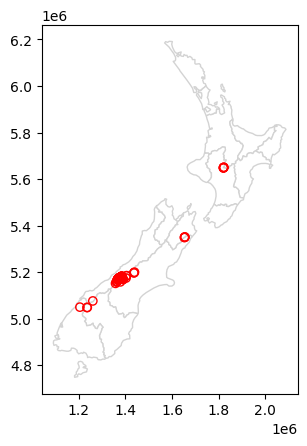

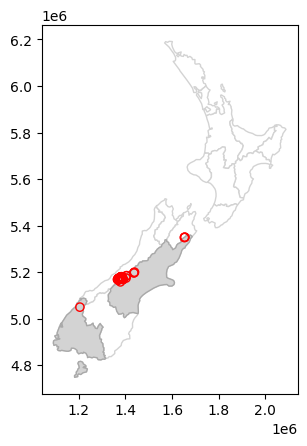

In [13]:
# Original
base = nz.plot(color='white', edgecolor='lightgrey')
nz_height.plot(ax=base, color='None', edgecolor='red');
# Subset by intersection with two polygons
base = nz.plot(color='white', edgecolor='lightgrey')
canterbury_southland.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
canterbury_southland_height.plot(ax=base, color='None', edgecolor='red');

### 3.2.2 Topological relations

In [14]:
points = gpd.GeoSeries([
  shapely.Point(0.2,0.1), 
  shapely.Point(0.7,0.2), 
  shapely.Point(0.4,0.8)
])
line = gpd.GeoSeries([
  shapely.LineString([(0.4,0.2), (1,0.5)])
])
poly = gpd.GeoSeries([
  shapely.Polygon([(0,0), (0,1), (1,1), (1,0.5), (0,0)])
])

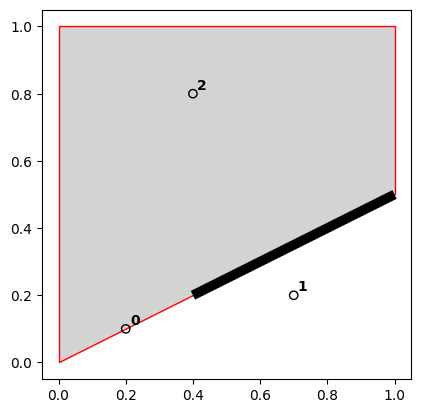

In [15]:
base = poly.plot(color='lightgrey', edgecolor='red')
line.plot(ax=base, color='black', linewidth=7)
points.plot(ax=base, color='none', edgecolor='black')

for i in enumerate(points):
    base.annotate(
        i[0], xy=(i[1].x, i[1].y), 
        xytext=(3, 3), textcoords='offset points', weight='bold'
    )

In [16]:
points.intersects(poly.iloc[0])

0     True
1    False
2     True
dtype: bool

In [17]:
poly2 = gpd.GeoSeries([
  shapely.Polygon([(0,0), (0,1), (1,1), (1,0.5), (0,0)]),
  shapely.Polygon([(0,0), (1,0.5), (1,0), (0,0)])    
])

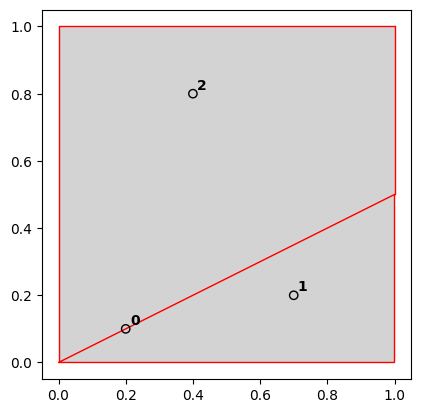

In [18]:
base = poly2.plot(color='lightgrey', edgecolor='red')
points.plot(ax=base, color='none', edgecolor='black')
for i in enumerate(points):
    base.annotate(
        i[0], xy=(i[1].x, i[1].y), 
        xytext=(3, 3), textcoords='offset points', weight='bold'
    )

In [19]:
points.apply(lambda x: poly2.intersects(x))

,0,1
0,True,True
1,False,True
2,True,False


In [20]:
poly2

0    POLYGON ((0 0, 0 1, 1 1, 1 0.5, 0 0))
1         POLYGON ((0 0, 1 0.5, 1 0, 0 0))
dtype: geometry

In [21]:
points.within(poly.iloc[0])

0    False
1    False
2     True
dtype: bool

In [22]:
points.disjoint(poly.iloc[0])

0    False
1     True
2    False
dtype: bool

In [23]:
points.distance(poly.iloc[0]) < 0.2

0    True
1    True
2    True
dtype: bool

In [24]:
points.iloc[1].distance(poly.iloc[0])

0.13416407864998736

In [25]:
np.random.seed(11)       ## set seed for reproducibility
bb = world.total_bounds  ## the world's bounds
x = np.random.uniform(low=bb[0], high=bb[2], size=10)
y = np.random.uniform(low=bb[1], high=bb[3], size=10)
random_points = gpd.points_from_xy(x, y, crs=4326)
random_points = gpd.GeoDataFrame({'geometry': random_points})
random_points

,geometry
0,POINT (-115.10291 36.78178)
1,POINT (-172.98891 -71.02938)
2,POINT (-13.24134 65.23272)
3,POINT (80.97621 58.85495)
4,POINT (-28.72671 -61.25002)
5,POINT (-5.24625 19.83849)
6,POINT (-175.39891 -86.34517)
7,POINT (-4.54623 -69.64082)
8,POINT (159.05039 -34.99599)
9,POINT (126.28622 -62.49509)


In [26]:
world_random = world[world.intersects(random_points.union_all())]
world_random

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911..."
18,RU,Russian Federation,Europe,Europe,Eastern Europe,Sovereign country,1.701851e+07,143819666.0,70.743659,25284.586202,"MULTIPOLYGON (((-180 64.97971, -179.43268 65.4..."
52,ML,Mali,Africa,Africa,Western Africa,Sovereign country,1.235561e+06,16962846.0,57.007000,1865.160622,"MULTIPOLYGON (((-11.51394 12.44299, -11.45617 ..."
159,AQ,Antarctica,Antarctica,Antarctica,Antarctica,Indeterminate,1.233596e+07,NaN,NaN,NaN,"MULTIPOLYGON (((-180 -89.9, 179.99999 -89.9, 1..."


In [30]:
random_points

,geometry
0,POINT (-115.10291 36.78178)
1,POINT (-172.98891 -71.02938)
2,POINT (-13.24134 65.23272)
3,POINT (80.97621 58.85495)
4,POINT (-28.72671 -61.25002)
5,POINT (-5.24625 19.83849)
6,POINT (-175.39891 -86.34517)
7,POINT (-4.54623 -69.64082)
8,POINT (159.05039 -34.99599)
9,POINT (126.28622 -62.49509)


In [27]:
random_joined_rev = world.sjoin(random_points, how='left')
random_joined_rev

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,index_right
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",NaN
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",NaN
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.18 5...",NaN
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Europe,Europe,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...",NaN
173,ME,Montenegro,Europe,Europe,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.0707 42.58863, 20.25758 42....",NaN
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",NaN
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",NaN


In [28]:
random_joined = random_points.sjoin(world, how='left')
random_joined

,geometry,index_right,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap
0,POINT (-115.10291 36.78178),4.0,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639
1,POINT (-172.98891 -71.02938),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (-13.24134 65.23272),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (80.97621 58.85495),18.0,RU,Russian Federation,Europe,Europe,Eastern Europe,Sovereign country,1.701851e+07,143819666.0,70.743659,25284.586202
4,POINT (-28.72671 -61.25002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,POINT (-5.24625 19.83849),52.0,ML,Mali,Africa,Africa,Western Africa,Sovereign country,1.235561e+06,16962846.0,57.007000,1865.160622
6,POINT (-175.39891 -86.34517),159.0,AQ,Antarctica,Antarctica,Antarctica,Antarctica,Indeterminate,1.233596e+07,NaN,NaN,NaN
7,POINT (-4.54623 -69.64082),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,POINT (159.05039 -34.99599),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POINT (126.28622 -62.49509),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


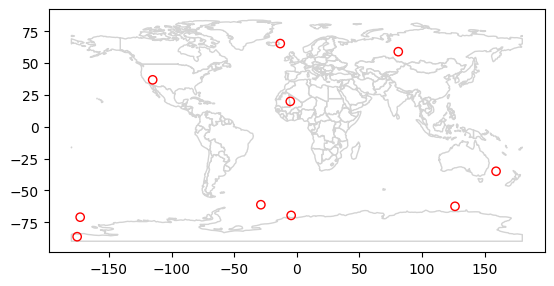

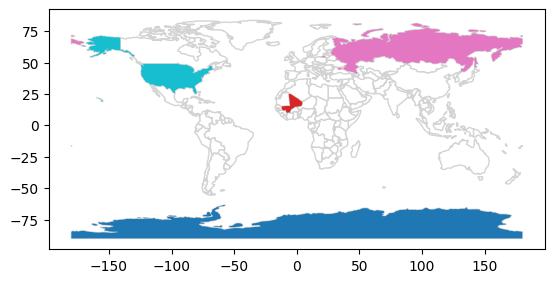

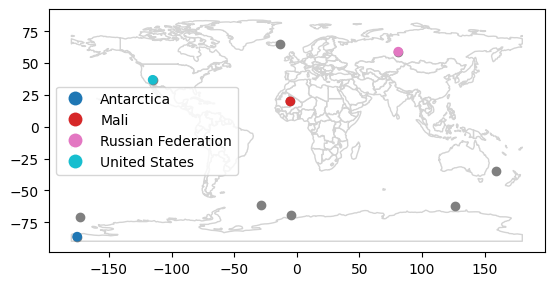

In [29]:
# Random points
base = world.plot(color='white', edgecolor='lightgrey')
random_points.plot(ax=base, color='None', edgecolor='red');
# World countries intersecting with the points
base = world.plot(color='white', edgecolor='lightgrey')
world_random.plot(ax=base, column='name_long');
# Points with joined country names
base = world.plot(color='white', edgecolor='lightgrey')
random_joined.geometry.plot(ax=base, color='grey')
random_joined.plot(ax=base, column='name_long', legend=True);

### Non-overlapping joins